In [1]:
import praw
import pandas as pd

: 

In [15]:
subReddits = ["pakistan", "islamabad", "lahore", "karachi", "technology", "tech", "technews", "news","worldnews", "sports", "youtube", "television", "relationship_advice", "relationships", "AskReddit", "ask", "Discussion", "Filmmakers", "filmmaking", "Movies","MovieSuggestions", "FASTNU", "NUST", "LinusTechTips", "religion", "Catholicism","islam", "progressive_islam", "Judaism", "Buddhism", "hinduism", "Freethought", "exmuslim",
              "exmormon", "skeptic", "Music", "todayilearned", "science", "showerthoughts", "space", "askscience", "mildlyinteresting", "explainlikeimfive", "LifeProTips", "GetMotivated", "Gadgets", "dataisbeautiful", "futurology", "Documentaries", "UpliftingNews", "personalfinance", "tifu", "philosophy", "history", "Damnthatsinteresting", "wallstreetbets", "NatureIsFuckingLit", "creepy", "InternetIsBeautiful", "lifehacks", "nba", "Fitness", "interestingasfuck", "travel", "nfl", "AdviceAnimals", "CryptoCurrency","politics", "NetflixBestOf", "mildlyinfuriating", "soccer", "Parenting", "europe", "buildapc", "gardening","Bitcoin", "cars", "programming", "apple", "YouShouldKnow", "nevertellmetheodds", "frugal", "coolguides", "socialskills", "foodhacks", "nasa", "nutrition", "NoStupidQuestions", "Economics", "TravelHacks", "biology", "dating_advice", "Survival", "unpopularopinion", "formula1", "PremierLeague", "bodyweightfitness", "MovieDetails", "learnprogramming", "Cooking", "iphone", "hardware", "Entrepreneur", "unitedkingdom", "careerguidance", "homeautomation", "changemyview", "psychology", "running", "compsci", "motorcycles", "math", "HealthyFood", "chemistry", "Baking", "StockMarket", "oddlyspecific", "JapanTravel", "bodybuilding", "Astronomy", "writing", "Health", "Atheism", "travelpartners"]

In [16]:
len(subReddits)

124

In [17]:
reddit = praw.Reddit(
            client_id='P4-FFLW065bTLnGSqfCnlg',
            client_secret='-EBrPckd7kwt0b8OaxJ-5cfwYRExQw',
            user_agent='MyRedditScraper/1.0 (Macintosh; Intel Mac OS X 14.3.1; Apple Silicon) Python/3.12 (fasihrem@gmail.com)'
        )

print(reddit.read_only)

True


In [18]:
srs = {}
for subreddits in subReddits:
    subs = reddit.subreddit(subreddits).subscribers
    print(f"r/{subreddits} has {subs} subscribers")
    
    if subreddits in srs:
        srs[subreddits].append(subs)
    else:
        srs[subreddits] = [subs]


r/pakistan has 295034 subscribers
r/islamabad has 103861 subscribers
r/lahore has 99509 subscribers
r/karachi has 63748 subscribers
r/technology has 17200548 subscribers
r/tech has 651583 subscribers
r/technews has 886447 subscribers
r/news has 28691376 subscribers
r/worldnews has 40918537 subscribers
r/sports has 21291060 subscribers
r/youtube has 2369521 subscribers
r/television has 17311024 subscribers
r/relationship_advice has 13966948 subscribers
r/relationships has 3530522 subscribers
r/AskReddit has 48517348 subscribers
r/ask has 1033167 subscribers
r/Discussion has 26754 subscribers
r/Filmmakers has 2830035 subscribers
r/filmmaking has 22419 subscribers
r/Movies has 33683919 subscribers
r/MovieSuggestions has 1556403 subscribers
r/FASTNU has 4961 subscribers
r/NUST has 15659 subscribers
r/LinusTechTips has 401346 subscribers
r/religion has 110656 subscribers
r/Catholicism has 227581 subscribers
r/islam has 315929 subscribers
r/progressive_islam has 38056 subscribers
r/Judaism h

In [22]:
srs_df = pd.DataFrame(list(srs.items()), columns=['Subreddit', 'Subscribers'])
srs_df['Subscribers'] = srs_df['Subscribers'].apply(lambda x: x[0] if isinstance(x, list) else x)
print(srs_df.head())


    Subreddit  Subscribers
0    pakistan       295034
1   islamabad       103861
2      lahore        99509
3     karachi        63748
4  technology     17200548


In [23]:
srs_df.to_csv("subscribers_count.csv")

In [19]:
def listSum(numbers):
    sum = 0
    for number in numbers:
        sum += number    
    return sum

In [11]:
values = {}
scores = []

In [12]:
for subreddits in subReddits:
    subreddit = reddit.subreddit(subreddits)
    for submission in subreddit.new(limit=1000):
        score = submission.score
        scores.append(score)
        
    avg = listSum(scores)/len(scores)
    values[subreddits] = avg
    print(f"{subreddits} has average score over 1000 new posts of {avg}")
    scores.clear()

pakistan has average score over 1000 new posts of 30.97658079625293
islamabad has average score over 1000 new posts of 20.783659378596088
lahore has average score over 1000 new posts of 14.287128712871286
karachi has average score over 1000 new posts of 18.782969885773625
technology has average score over 1000 new posts of 1607.8362068965516
tech has average score over 1000 new posts of 892.3216132368149
technews has average score over 1000 new posts of 397.56827309236945
news has average score over 1000 new posts of 6421.040935672515
worldnews has average score over 1000 new posts of 1658.864
sports has average score over 1000 new posts of 1737.0
youtube has average score over 1000 new posts of 160.6198243412798
television has average score over 1000 new posts of 789.6862745098039
relationship_advice has average score over 1000 new posts of 22.786008230452676
relationships has average score over 1000 new posts of 21.006430868167204
AskReddit has average score over 1000 new posts of 4.

NotFound: received 404 HTTP response

In [ ]:
import matplotlib.pyplot as plt

names = list(values.keys())
sc = list(values.values())

plt.plot(names, sc)
plt.xlabel('Subreddits')
plt.ylabel('Scores over New Posts')
plt.title('Scores by Name')
plt.show()

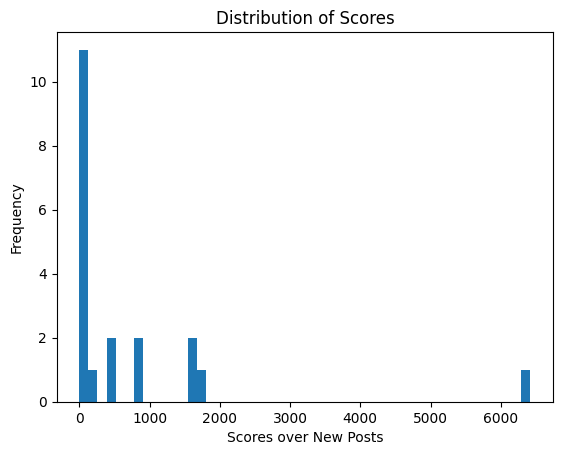

In [14]:
plt.hist(sc, bins=50)
plt.xlabel('Scores over New Posts')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

In [16]:
for subreddits in subReddits:
    subreddit = reddit.subreddit(subreddits)
    for submission in subreddit.hot(limit=1000):
        score = submission.score
        scores.append(score)
        
    avg = listSum(scores)/len(scores)
    values[subreddits] = avg
    print(f"{subreddits} has average score over 1000 new posts of {avg}")
    scores.clear()

pakistan has average score over 1000 new posts of 25.449370880766928
islamabad has average score over 1000 new posts of 21.166315789473686
lahore has average score over 1000 new posts of 13.147727272727273
karachi has average score over 1000 new posts of 19.3980044345898
technology has average score over 1000 new posts of 1774.4217032967033
tech has average score over 1000 new posts of 844.7633027522936
technews has average score over 1000 new posts of 460.93078758949883
news has average score over 1000 new posts of 6350.532663316583
worldnews has average score over 1000 new posts of 1934.0302491103203
sports has average score over 1000 new posts of 1760.2849056603773
youtube has average score over 1000 new posts of 183.01045751633987
television has average score over 1000 new posts of 866.1716514954486
relationship_advice has average score over 1000 new posts of 57.242372881355934
relationships has average score over 1000 new posts of 21.211267605633804
AskReddit has average score ove

NotFound: received 404 HTTP response

In [17]:
import numpy as np

sco = list(values.values())

max_scores = max(sco)
min_scores = min(sco)

normalized_scores_minmax = [(score - min_scores) / (max_scores - min_scores) for score in sco]

mean_score = np.mean(scores)
std_dev_score = np.std(scores)
normalized_scores_zscore = [(score - mean_score) / std_dev_score for score in sco]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encount